# Índice
<hr>

1. [Cargar datos](#cargar-datos)  
   Cargar archivos .pdbqt, .csv y otros datos necesarios.  

2. [Codigo para PLIP](#codigo-para-plip)  
   Unir, filtrar y transformar los datos de las bases iniciales.  

3. [Analizar inhibidores](#analizar-inhibidores)  
   Comparar resultados y extraer información clave de los ligandos.


# Cargar datos
<hr>

In [1]:
import pandas as pd

In [5]:
df_duales = pd.read_csv("df_mejores/Inhibidores/duales.csv")
df_inhib_triples = pd.read_csv("df_mejores/inhibidores/triples.csv")
df_Bases = pd.read_csv("df_mejores/Bases/EGFR_MAPK1.csv")

# Codigo para PLIP
<hr>

#Codigo para analisis de interacciones

In [5]:
import glob
import os
import subprocess
import glob
from collections import Counter
import pandas as pd
from pandas import DataFrame


def arregla_LU(x):
    lista = [', ;']
    if type(x)==str:
        for l in lista:
            x=x.replace(l,';')
        return x
    else:
        return x

def tabla_inter(lista):
  '''Tipo de interacciones de cada ligando en tabla'''
  ligandos = []
  hi_i = {}
  hb_i = {}
  sb_i = {}
  pi_s_i = {}
  halb_i = {}
  met_i = {}
  wat_i = {}
  picat_i = {}

  for i in lista:
      lig = i.split('/')[-2].replace('complejo_','')#.split('_')[-1]
      #print(lig)
      ligandos.append(lig)
      entrar=open(i.strip() + 'report.txt','r') # para entrar a cada carpeta
      entrar=[i for i in entrar.readlines()]
      resid=[]
      tipos = []
      for i in entrar:
          if '**' in i:
              tip=i[2:-4].strip()
              tipos.append(tip)
          elif i.count('|') > 1 and not 'RESNR' in i:
              resid.append(lig+' '+tip+' '+i.split()[3]+' '+i.split()[1])

      aa = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
      'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N',
      'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
      'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','UNK':'lig','UNL':'UNL'}

      lig_hi = []
      lig_hb = []
      lig_sb = []
      lig_pis = []
      lig_halb = []
      lig_met = []
      lig_wat = []
      lig_picat = []
      for i in resid:
          if 'Hydrophobic' in i:
              lig_hi.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Hydrogen' in i:
              lig_hb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
              #print(i.split())
          elif 'Salt Bridge' in i:
              lig_sb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'pi-Stackin' in i:
              lig_pis.append(i.split()[0]+' '+aa[i.split()[2]]+i.split()[3])
              #print(i.split())
          elif 'Halogen Bond' in i:
              lig_halb.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Metal Complexe' in i:
              #print(i)
              lig_met.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'Water Bridge' in i:
              lig_wat.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])
          elif 'pi-Cation Interaction' in i:
              lig_picat.append(i.split()[0]+' '+aa[i.split()[3]]+i.split()[4])

      hi = Counter(lig_hi)
      hb = Counter(lig_hb)
      sb = Counter(lig_sb)
      pi_s = Counter(lig_pis)
      halb = Counter(lig_halb)
      met = Counter(lig_met)
      wat = Counter(lig_wat)
      picat = Counter(lig_picat)

      hi_prueba = []
      hi_residuo = ''
      for a,b in hi.items():
          hi_prueba.append(a.split()[0])
          hi_residuo+=a.split()[1]+', '
      
      hi_i[str(set(hi_prueba))[2:-2]] = 'HI. '+hi_residuo

      hb_prueba = []
      hb_residuo = ''
      for a,b in hb.items():
          hb_prueba.append(a.split()[0])
          hb_residuo+=a.split()[1]+', '
      hb_i[str(set(hb_prueba))[2:-2]] = '; HB. '+hb_residuo

      sb_prueba = []
      sb_residuo = ''
      for a,b in sb.items():
          sb_prueba.append(a.split()[0])
          sb_residuo+=a.split()[1]+', '
      sb_i[str(set(sb_prueba))[2:-2]] = '; SB. '+sb_residuo

      pi_s_prueba = []
      pi_s_residuo = ''
      for a,b in pi_s.items():
          pi_s_prueba.append(a.split()[0])
          pi_s_residuo+=a.split()[1]+', '
      pi_s_i[str(set(pi_s_prueba))[2:-2]] = '; π-s. '+pi_s_residuo

      halb_prueba = []
      halb_residuo = ''
      for a,b in halb.items():
          halb_prueba.append(a.split()[0])
          halb_residuo+=a.split()[1]+', '
      halb_i[str(set(halb_prueba))[2:-2]] = '; HalB. '+halb_residuo

      met_prueba = []
      met_residuo = ''
      for a,b in met.items():
          met_prueba.append(a.split()[0])
          met_residuo+=a.split()[1]+', '
      met_i[str(set(met_prueba))[2:-2]] = '; Met. '+met_residuo

      wat_prueba = []
      wat_residuo = ''
      for a,b in wat.items():
          wat_prueba.append(a.split()[0])
          wat_residuo+=a.split()[1]+', '
      wat_i[str(set(wat_prueba))[2:-2]] = '; Wat. '+wat_residuo

      picat_prueba = []
      picat_residuo = ''
      for a,b in picat.items():
          picat_prueba.append(a.split()[0])
          picat_residuo+=a.split()[1]+', '
      picat_i[str(set(picat_prueba))[2:-2]] = '; π-c. '+picat_residuo

  col = ['ligandos']
  tabla = pd.DataFrame(ligandos,columns=col)
  tabla = tabla.sort_values(by=['ligandos'], ascending=True)
  tabla['HI'] = tabla['ligandos'].map(hi_i)
  tabla['HB'] = tabla['ligandos'].map(hb_i)
  tabla['SB'] = tabla['ligandos'].map(sb_i)
  tabla['π-s'] = tabla['ligandos'].map(pi_s_i)
  tabla['HalB'] = tabla['ligandos'].map(halb_i)
  tabla['Met_com'] = tabla['ligandos'].map(met_i)
  tabla['WB'] = tabla['ligandos'].map(wat_i)
  tabla['π-c'] = tabla['ligandos'].map(picat_i)
  tabla = tabla.fillna('')
  tabla["Interacciones"] = tabla["HI"] + tabla["HB"] + tabla["SB"] + tabla["π-s"] + tabla["HalB"] + tabla["Met_com"] + tabla["WB"] + tabla["π-c"]
  guardar = tabla[['ligandos','Interacciones']]
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')

  # Nombre de la tabla de interacciones
  nom_tab_inter = "Interacciones"
  guardar.to_csv(nom_tab_inter+'.csv')
  return guardar


In [21]:
df_Bases

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2,Targets,Ruta_PDB_1,Ruta_PDB_2
0,EGFR_MAPK1_1027,-11.204316,-10.396870,7.940212,7.388982,0.730902,0.339732,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1027_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1027_L_MAPK1.pdb
1,EGFR_MAPK1_1035,-9.737412,-10.569093,7.700487,8.297848,0.368035,0.377597,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1035_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1035_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1035_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1035_L_MAPK1.pdb
2,EGFR_MAPK1_1036,-9.368133,-10.595299,6.261465,7.116983,0.367311,0.554556,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1036_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1036_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1036_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1036_L_MAPK1.pdb
3,EGFR_MAPK1_1049,-11.007574,-11.025945,8.053848,7.812952,0.724656,0.478807,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1049_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1049_L_MAPK1.pdb
4,EGFR_MAPK1_1066,-10.141174,-10.511439,7.038200,7.030637,0.473571,0.356068,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1066_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1066_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1066_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1066_L_MAPK1.pdb
5,EGFR_MAPK1_1079,-9.491706,-10.725167,6.329308,7.573474,0.296380,0.256530,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1079_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1079_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1079_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1079_L_MAPK1.pdb
6,EGFR_MAPK1_129,-9.493497,-10.424808,6.921558,6.923174,0.545264,0.503629,Mejores_poses/bases_conjuntas/EGFR_MAPK1_129_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_129_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_129_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_129_L_MAPK1.pdb
7,EGFR_MAPK1_144,-9.409277,-10.425663,7.392756,7.950451,0.567591,0.640764,Mejores_poses/bases_conjuntas/EGFR_MAPK1_144_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_144_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_144_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_144_L_MAPK1.pdb
8,EGFR_MAPK1_170,-11.316882,-10.977460,7.682775,7.792478,0.976932,0.914965,Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_170_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_170_L_MAPK1.pdb
9,EGFR_MAPK1_229,-9.461443,-10.946233,7.565014,8.185574,0.813282,0.895772,Mejores_poses/bases_conjuntas/EGFR_MAPK1_229_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_229_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_229_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_229_L_MAPK1.pdb


# Crear PDBS
<hr>

In [46]:
# -------------------------------------- CREAR PDBS PARA LOS COMPUESTOS DE LAS BASES --------------------------------------

# Importar librerías
import glob
import os
import subprocess

# Definir rutas de los compuestos en pdbqt para las dos proteínas
ruta_1 = df_Bases["Ruta_1"]
ruta_2 = df_Bases["Ruta_2"]

# Definir la ruta de salida para los archivos PDB
ruta_salida = "PDBS/Bases"
os.makedirs(ruta_salida, exist_ok=True)

# Definir en el df las rutas de salida de los PDBs
df_Bases["Ruta_PDB_1"] = df_Bases.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_Bases["Ruta_PDB_2"] = df_Bases.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

# Convertir cada archivo
for index, row in df_Bases.iterrows():

    print(row["Ruta_1"])

    cmd1 = ["obabel", "-ipdbqt", row["Ruta_1"], "-opdb", "-O", row["Ruta_PDB_1"]]
    cmd2 = ["obabel", "-ipdbqt", row["Ruta_2"], "-opdb", "-O", row["Ruta_PDB_2"]]

    subprocess.run(cmd1, check=True)
    subprocess.run(cmd2, check=True)

    # Procesar PDB 1: reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_1"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_1"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    # Procesar PDB 2: reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_2"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_2"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    print(f'Convertida la molécula: {row["Molecula"]}')


Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_1027
Mejores_poses/bases_conjuntas/EGFR_MAPK1_1035_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_1035
Mejores_poses/bases_conjuntas/EGFR_MAPK1_1036_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_1036
Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_1049
Mejores_poses/bases_conjuntas/EGFR_MAPK1_1066_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_1066
Mejores_poses/bases_conjuntas/EGFR_MAPK1_1079_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_1079
Mejores_poses/bases_conjuntas/EGFR_MAPK1_129_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_MAPK1.pdbqt)

1 molecule converted


Convertida la molécula: EGFR_MAPK1_129
Mejores_poses/bases_conjuntas/EGFR_MAPK1_144_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_144
Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_170
Mejores_poses/bases_conjuntas/EGFR_MAPK1_229_EGFR.pdbqt


1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_241_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_241_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_252_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_252_MAPK1.pdbqt)

1 molecule converted


Convertida la molécula: EGFR_MAPK1_229
Mejores_poses/bases_conjuntas/EGFR_MAPK1_241_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_241
Mejores_poses/bases_conjuntas/EGFR_MAPK1_252_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_252
Mejores_poses/bases_conjuntas/EGFR_MAPK1_264_EGFR.pdbqt


1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_296_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/bases_conjuntas/EGFR_MAPK1_296_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_264
Mejores_poses/bases_conjuntas/EGFR_MAPK1_296_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_296
Mejores_poses/bases_conjuntas/EGFR_MAPK1_42_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_42
Mejores_poses/bases_conjuntas/EGFR_MAPK1_440_EGFR.pdbqt


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Convertida la molécula: EGFR_MAPK1_440
Mejores_poses/bases_conjuntas/EGFR_MAPK1_527_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_527
Mejores_poses/bases_conjuntas/EGFR_MAPK1_77_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_77
Mejores_poses/bases_conjuntas/EGFR_MAPK1_779_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_779
Mejores_poses/bases_conjuntas/EGFR_MAPK1_800_EGFR.pdbqt
Convertida la molécula: EGFR_MAPK1_800


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [47]:
# -------------------------------------- CREAR PDBS PARA LOS COMPUESTOS DUALES DE INHIBIDORES --------------------------------------

# Importar librerías
import glob
import os
import subprocess

# Definir la ruta de salida para los archivos PDB
ruta_salida = "PDBS/Inhibidores"
os.makedirs(ruta_salida, exist_ok=True)

# Definir en el df las rutas de salida de los PDBs
df_duales["Ruta_PDB_1"] = df_duales.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target']}.pdb"),
    axis=1
)

# Convertir cada archivo
for index, row in df_duales.iterrows():

    print(row["Ruta"])

    cmd = ["obabel", "-ipdbqt", row["Ruta"], "-opdb", "-O", row["Ruta_PDB_1"]]

    subprocess.run(cmd, check=True)

    # Reemplazar "ATOM" por "HETATM" y eliminar "CONECT"
    with open(row["Ruta_PDB_1"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_1"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    print(f'Convertida la molécula: {row["Molecula"]}')


Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_0
Mejores_poses/inhibidores/MAPK1_P_EGFR_10_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_10
Mejores_poses/inhibidores/MAPK1_P_EGFR_15_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_15
Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_18
Mejores_poses/inhibidores/MAPK1_P_EGFR_19_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_19
Mejores_poses/inhibidores/MAPK1_P_EGFR_21_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_10_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_15_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_19_EGFR.pdbqt)

1 molecule converted
*** Open Babel W

Convertida la molécula: MAPK1_P_EGFR_21
Mejores_poses/inhibidores/MAPK1_P_EGFR_22_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_22
Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_24
Mejores_poses/inhibidores/MAPK1_P_EGFR_26_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_26
Mejores_poses/inhibidores/MAPK1_P_EGFR_27_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_27
Mejores_poses/inhibidores/MAPK1_P_EGFR_2_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_2
Mejores_poses/inhibidores/MAPK1_P_EGFR_31_EGFR.pdbqt


1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_26_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_27_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_2_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_31_EGFR.pdbqt)

1 molecule conve

Convertida la molécula: MAPK1_P_EGFR_31
Mejores_poses/inhibidores/MAPK1_P_EGFR_36_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_36
Mejores_poses/inhibidores/MAPK1_P_EGFR_37_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_37
Mejores_poses/inhibidores/MAPK1_P_EGFR_3_EGFR.pdbqt
Convertida la molécula: MAPK1_P_EGFR_3
Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_81_EGFR.pdbqt
Convertida la molécula: SRC_MAPK1_P_EGFR_81
Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_82_EGFR.pdbqt
Convertida la molécula: SRC_MAPK1_P_EGFR_82
Mejores_poses/inhibidores/SRC_P_EGFR_39_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_36_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/MAPK1_P_EGFR_37_EGFR.pdbqt)

1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_81_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_MAPK1_P_EGFR_82_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_39_EGFR.pdbqt)

1 molecul

Convertida la molécula: SRC_P_EGFR_39
Mejores_poses/inhibidores/SRC_P_EGFR_45_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_45
Mejores_poses/inhibidores/SRC_P_EGFR_47_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_47
Mejores_poses/inhibidores/SRC_P_EGFR_49_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_49
Mejores_poses/inhibidores/SRC_P_EGFR_50_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_50
Mejores_poses/inhibidores/SRC_P_EGFR_51_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_51
Mejores_poses/inhibidores/SRC_P_EGFR_52_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_45_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_47_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_49_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_50_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_51_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: SRC_P_EGFR_52
Mejores_poses/inhibidores/SRC_P_EGFR_53_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_53
Mejores_poses/inhibidores/SRC_P_EGFR_54_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_54
Mejores_poses/inhibidores/SRC_P_EGFR_56_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_56
Mejores_poses/inhibidores/SRC_P_EGFR_60_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_60
Mejores_poses/inhibidores/SRC_P_EGFR_65_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_65
Mejores_poses/inhibidores/SRC_P_EGFR_68_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_53_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_54_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_56_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_60_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_65_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: SRC_P_EGFR_68
Mejores_poses/inhibidores/SRC_P_EGFR_71_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_71
Mejores_poses/inhibidores/SRC_P_EGFR_72_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_72
Mejores_poses/inhibidores/SRC_P_EGFR_73_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_73
Mejores_poses/inhibidores/SRC_P_EGFR_74_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_74
Mejores_poses/inhibidores/SRC_P_EGFR_75_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_75
Mejores_poses/inhibidores/SRC_P_EGFR_76_EGFR.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_71_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_72_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_73_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_74_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_75_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: SRC_P_EGFR_76
Mejores_poses/inhibidores/SRC_P_EGFR_79_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_79
Mejores_poses/inhibidores/EGFR_P_MAPK1_102_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_102
Mejores_poses/inhibidores/EGFR_P_MAPK1_103_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_103
Mejores_poses/inhibidores/EGFR_P_MAPK1_90_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_90
Mejores_poses/inhibidores/EGFR_P_MAPK1_94_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_94
Mejores_poses/inhibidores/EGFR_P_MAPK1_97_MAPK1.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_79_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_102_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_103_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_90_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_94_MAPK1.pdbqt)

1 molecule converted
*** Open Ba

Convertida la molécula: EGFR_P_MAPK1_97
Mejores_poses/inhibidores/SRC_EGFR_P_MAPK1_126_MAPK1.pdbqt
Convertida la molécula: SRC_EGFR_P_MAPK1_126
Mejores_poses/inhibidores/SRC_P_MAPK1_105_MAPK1.pdbqt
Convertida la molécula: SRC_P_MAPK1_105
Mejores_poses/inhibidores/EGFR_P_SRC_128_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_128
Mejores_poses/inhibidores/EGFR_P_SRC_129_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_129
Mejores_poses/inhibidores/EGFR_P_SRC_130_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_130
Mejores_poses/inhibidores/EGFR_P_SRC_131_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_EGFR_P_MAPK1_126_MAPK1.pdbqt)

1 molecule converted
1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_128_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_129_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_130_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_131_SRC.pdbqt)

1 molecule conver

Convertida la molécula: EGFR_P_SRC_131
Mejores_poses/inhibidores/EGFR_P_SRC_132_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_132
Mejores_poses/inhibidores/EGFR_P_SRC_133_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_133
Mejores_poses/inhibidores/EGFR_P_SRC_134_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_134
Mejores_poses/inhibidores/EGFR_P_SRC_135_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_135
Mejores_poses/inhibidores/EGFR_P_SRC_136_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_136
Mejores_poses/inhibidores/EGFR_P_SRC_137_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_132_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_133_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_134_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_135_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_136_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: EGFR_P_SRC_137
Mejores_poses/inhibidores/EGFR_P_SRC_138_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_138
Mejores_poses/inhibidores/EGFR_P_SRC_139_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_139
Mejores_poses/inhibidores/EGFR_P_SRC_140_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_140
Mejores_poses/inhibidores/EGFR_P_SRC_141_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_141
Mejores_poses/inhibidores/EGFR_P_SRC_142_SRC.pdbqt
Convertida la molécula: EGFR_P_SRC_142
Mejores_poses/inhibidores/EGFR_P_SRC_143_SRC.pdbqt


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_138_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_139_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_140_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_141_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_SRC_142_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  i

Convertida la molécula: EGFR_P_SRC_143


1 molecule converted


In [37]:
df_inhib_triples

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2
0,EGFR_P_MAPK1_SRC_127,-11.026921,-10.422901,7.970762,8.025414,0.817016,0.953701,Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127...,Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127...,MAPK1,SRC
1,SRC_P_EGFR_MAPK1_84,-9.374156,-10.189130,6.048785,7.795960,0.171025,0.236191,Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_...,Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_...,EGFR,MAPK1
2,SRC_P_EGFR_STAT3_85,-10.042954,-7.373975,6.901542,6.871679,0.303968,0.756590,Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_...,Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_...,EGFR,STAT3


In [48]:
# -------------------------------------- CREAR PDBS PARA LOS COMPUESTOS TRIPLES DE INHIBIDORES --------------------------------------

# Importar librerías
import glob
import os
import subprocess

# Definir la ruta de salida para los archivos PDB
ruta_salida = "PDBS/Bases"
os.makedirs(ruta_salida, exist_ok=True)

# Definir en el df las rutas de salida de los PDBs
df_inhib_triples["Ruta_PDB_1"] = df_inhib_triples.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_inhib_triples["Ruta_PDB_2"] = df_inhib_triples.apply(
    lambda row: os.path.join(ruta_salida, f"{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

# Convertir cada archivo
for index, row in df_inhib_triples.iterrows():

    print(row["Ruta_1"])

    cmd1 = ["obabel", "-ipdbqt", row["Ruta_1"], "-opdb", "-O", row["Ruta_PDB_1"]]
    cmd2 = ["obabel", "-ipdbqt", row["Ruta_2"], "-opdb", "-O", row["Ruta_PDB_2"]]

    subprocess.run(cmd1, check=True)
    subprocess.run(cmd2, check=True)

    # Procesar archivo 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_1"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    # Procesar archivo 2
    with open(row["Ruta_PDB_2"], "r") as f:
        lines = f.readlines()

    with open(row["Ruta_PDB_2"], "w") as f:
        for line in lines:
            if line.startswith("CONECT"):
                continue
            if line.startswith("ATOM"):
                line = "HETATM" + line[6:]
            f.write(line)

    print(f'Convertida la molécula: {row["Molecula"]}')


Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127_MAPK1.pdbqt
Convertida la molécula: EGFR_P_MAPK1_SRC_127
Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_MAPK1_84
Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_EGFR.pdbqt
Convertida la molécula: SRC_P_EGFR_STAT3_85


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127_SRC.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_EGFR.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_MAPK1.pdbqt)

1 molecule converted
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_EGFR.pdbqt)

1 molecule co

# Crear complejos
<hr>

In [55]:
# Definir la ruta de las proteínas
proteinas = {"EGFR": "PDBS/Proteinas/EGFR.pdb",
 "MAPK1": "PDBS/Proteinas/MAPK1.pdb",
 "SRC": "PDBS/Proteinas/SRC.pdb",
 "STAT3": "PDBS/Proteinas/STAT3.pdb",}

In [56]:
df_Bases

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2,Targets,Ruta_PDB_1,Ruta_PDB_2,Ruta_Complejo_1,Ruta_Complejo_2
0,EGFR_MAPK1_1027,-11.204316,-10.396870,7.940212,7.388982,0.730902,0.339732,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1027_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1027_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1027_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1027_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1027_L_MAPK...
1,EGFR_MAPK1_1035,-9.737412,-10.569093,7.700487,8.297848,0.368035,0.377597,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1035_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1035_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1035_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1035_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1035_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1035_L_MAPK...
2,EGFR_MAPK1_1036,-9.368133,-10.595299,6.261465,7.116983,0.367311,0.554556,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1036_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1036_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1036_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1036_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1036_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1036_L_MAPK...
3,EGFR_MAPK1_1049,-11.007574,-11.025945,8.053848,7.812952,0.724656,0.478807,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1049_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1049_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1049_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1049_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1049_L_MAPK...
4,EGFR_MAPK1_1066,-10.141174,-10.511439,7.038200,7.030637,0.473571,0.356068,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1066_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1066_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1066_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1066_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1066_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1066_L_MAPK...
5,EGFR_MAPK1_1079,-9.491706,-10.725167,6.329308,7.573474,0.296380,0.256530,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1079_...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_1079_...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_1079_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_1079_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_1079_L_EGFR...,Complejos/Bases/Complex_EGFR_MAPK1_1079_L_MAPK...
6,EGFR_MAPK1_129,-9.493497,-10.424808,6.921558,6.923174,0.545264,0.503629,Mejores_poses/bases_conjuntas/EGFR_MAPK1_129_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_129_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_129_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_129_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_129_L_EGFR.pdb,Complejos/Bases/Complex_EGFR_MAPK1_129_L_MAPK1...
7,EGFR_MAPK1_144,-9.409277,-10.425663,7.392756,7.950451,0.567591,0.640764,Mejores_poses/bases_conjuntas/EGFR_MAPK1_144_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_144_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_144_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_144_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_144_L_EGFR.pdb,Complejos/Bases/Complex_EGFR_MAPK1_144_L_MAPK1...
8,EGFR_MAPK1_170,-11.316882,-10.977460,7.682775,7.792478,0.976932,0.914965,Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_170_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_170_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_170_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_170_L_EGFR.pdb,Complejos/Bases/Complex_EGFR_MAPK1_170_L_MAPK1...
9,EGFR_MAPK1_229,-9.461443,-10.946233,7.565014,8.185574,0.813282,0.895772,Mejores_poses/bases_conjuntas/EGFR_MAPK1_229_E...,Mejores_poses/bases_conjuntas/EGFR_MAPK1_229_M...,EGFR,MAPK1,EGFR_MAPK1,PDBS/Bases/EGFR_MAPK1_229_L_EGFR.pdb,PDBS/Bases/EGFR_MAPK1_229_L_MAPK1.pdb,Complejos/Bases/Complex_EGFR_MAPK1_229_L_EGFR.pdb,Complejos/Bases/Complex_EGFR_MAPK1_229_L_MAPK1...


In [ ]:
# ---------------------------------- CREAR COMPLEJOS PARA LAS BASES------------------------------------

import glob
import os
import subprocess

# Nombre de los archivos de salida complejos
complejos_folder = "Complejos/Bases"
os.makedirs(complejos_folder, exist_ok=True)

# Definir rutas de los complejos
df_Bases["Ruta_Complejo_1"] = df_Bases.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_Bases["Ruta_Complejo_2"] = df_Bases.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

for index, row in df_Bases.iterrows():

    # Definir proteína 1 y 2
    proteina_1 = row["Target_1"]
    proteina_2 = row["Target_2"]
    
    # Definir rutas de las proteínas 1 y 2
    ruta_proteina_1 = proteinas[proteina_1]
    ruta_proteina_2 = proteinas[proteina_2]

    # Cargar proteína 1
    with open(ruta_proteina_1, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]

    # Guardar el complejo 1
    with open(row["Ruta_Complejo_1"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    # Cargar proteína 2
    with open(ruta_proteina_2, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 2
    with open(row["Ruta_PDB_2"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]
    
    # Guardar el complejo 2
    with open(row["Ruta_Complejo_2"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    print(f"✅ Complejos generados para: {row['Molecula']}")

✅ Complejos generados para: EGFR_MAPK1_1027
✅ Complejos generados para: EGFR_MAPK1_1035
✅ Complejos generados para: EGFR_MAPK1_1036
✅ Complejos generados para: EGFR_MAPK1_1049
✅ Complejos generados para: EGFR_MAPK1_1066
✅ Complejos generados para: EGFR_MAPK1_1079
✅ Complejos generados para: EGFR_MAPK1_129
✅ Complejos generados para: EGFR_MAPK1_144
✅ Complejos generados para: EGFR_MAPK1_170
✅ Complejos generados para: EGFR_MAPK1_229
✅ Complejos generados para: EGFR_MAPK1_241
✅ Complejos generados para: EGFR_MAPK1_252
✅ Complejos generados para: EGFR_MAPK1_264
✅ Complejos generados para: EGFR_MAPK1_296
✅ Complejos generados para: EGFR_MAPK1_42
✅ Complejos generados para: EGFR_MAPK1_440
✅ Complejos generados para: EGFR_MAPK1_527
✅ Complejos generados para: EGFR_MAPK1_77
✅ Complejos generados para: EGFR_MAPK1_779
✅ Complejos generados para: EGFR_MAPK1_800


In [58]:
df_duales

,Molecula,Target,Ruta,Afinidad,CNN,CNN afinity,Ruta_PDB_1
0,MAPK1_P_EGFR_0,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_0_EGFR....,-9.640115,0.587260,7.257383,PDBS/Inhibidores/MAPK1_P_EGFR_0_L_EGFR.pdb
1,MAPK1_P_EGFR_10,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_10_EGFR...,-10.543703,0.549467,7.658800,PDBS/Inhibidores/MAPK1_P_EGFR_10_L_EGFR.pdb
2,MAPK1_P_EGFR_15,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_15_EGFR...,-10.244492,0.721842,7.748184,PDBS/Inhibidores/MAPK1_P_EGFR_15_L_EGFR.pdb
3,MAPK1_P_EGFR_18,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_18_EGFR...,-10.465252,0.263341,6.465981,PDBS/Inhibidores/MAPK1_P_EGFR_18_L_EGFR.pdb
4,MAPK1_P_EGFR_19,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_19_EGFR...,-9.747408,0.565704,7.295181,PDBS/Inhibidores/MAPK1_P_EGFR_19_L_EGFR.pdb
5,MAPK1_P_EGFR_21,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_21_EGFR...,-10.220153,0.638526,7.272161,PDBS/Inhibidores/MAPK1_P_EGFR_21_L_EGFR.pdb
6,MAPK1_P_EGFR_22,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_22_EGFR...,-9.635506,0.689048,6.326313,PDBS/Inhibidores/MAPK1_P_EGFR_22_L_EGFR.pdb
7,MAPK1_P_EGFR_24,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_24_EGFR...,-9.687467,0.565818,7.077176,PDBS/Inhibidores/MAPK1_P_EGFR_24_L_EGFR.pdb
8,MAPK1_P_EGFR_26,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_26_EGFR...,-10.176990,0.711661,8.134231,PDBS/Inhibidores/MAPK1_P_EGFR_26_L_EGFR.pdb
9,MAPK1_P_EGFR_27,EGFR,Mejores_poses/inhibidores/MAPK1_P_EGFR_27_EGFR...,-9.469514,0.776916,7.338331,PDBS/Inhibidores/MAPK1_P_EGFR_27_L_EGFR.pdb


In [59]:
# ---------------------------------- CREAR COMPLEJOS PARA LOS DUALES INHIBIDORES ------------------------------------

import glob
import os
import subprocess

# Nombre de los archivos de salida complejos
complejos_folder = "Complejos/Inhibidores"
os.makedirs(complejos_folder, exist_ok=True)

# Definir rutas de los complejos
df_duales["Ruta_Complejo_1"] = df_duales.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target']}.pdb"),
    axis=1
)

for index, row in df_duales.iterrows():

    # Definir proteína 1
    proteina_1 = row["Target"]
    
    # Definir rutas de las proteínas 1
    ruta_proteina_1 = proteinas[proteina_1]

    # Cargar proteína 1
    with open(ruta_proteina_1, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]

    # Guardar el complejo 1
    with open(row["Ruta_Complejo_1"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    print(f"✅ Complejos generados para: {row['Molecula']}")

✅ Complejos generados para: MAPK1_P_EGFR_0
✅ Complejos generados para: MAPK1_P_EGFR_10
✅ Complejos generados para: MAPK1_P_EGFR_15
✅ Complejos generados para: MAPK1_P_EGFR_18
✅ Complejos generados para: MAPK1_P_EGFR_19
✅ Complejos generados para: MAPK1_P_EGFR_21
✅ Complejos generados para: MAPK1_P_EGFR_22
✅ Complejos generados para: MAPK1_P_EGFR_24
✅ Complejos generados para: MAPK1_P_EGFR_26
✅ Complejos generados para: MAPK1_P_EGFR_27
✅ Complejos generados para: MAPK1_P_EGFR_2
✅ Complejos generados para: MAPK1_P_EGFR_31
✅ Complejos generados para: MAPK1_P_EGFR_36
✅ Complejos generados para: MAPK1_P_EGFR_37
✅ Complejos generados para: MAPK1_P_EGFR_3
✅ Complejos generados para: SRC_MAPK1_P_EGFR_81
✅ Complejos generados para: SRC_MAPK1_P_EGFR_82
✅ Complejos generados para: SRC_P_EGFR_39
✅ Complejos generados para: SRC_P_EGFR_45
✅ Complejos generados para: SRC_P_EGFR_47
✅ Complejos generados para: SRC_P_EGFR_49
✅ Complejos generados para: SRC_P_EGFR_50
✅ Complejos generados para: SRC_P_EGF

In [60]:
df_inhib_triples

,Molecula,Afinidad_1,Afinidad_2,CNN afinity_1,CNN afinity_2,CNN_1,CNN_2,Ruta_1,Ruta_2,Target_1,Target_2,Ruta_PDB_1,Ruta_PDB_2
0,EGFR_P_MAPK1_SRC_127,-11.026921,-10.422901,7.970762,8.025414,0.817016,0.953701,Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127...,Mejores_poses/inhibidores/EGFR_P_MAPK1_SRC_127...,MAPK1,SRC,PDBS/Bases/EGFR_P_MAPK1_SRC_127_L_MAPK1.pdb,PDBS/Bases/EGFR_P_MAPK1_SRC_127_L_SRC.pdb
1,SRC_P_EGFR_MAPK1_84,-9.374156,-10.189130,6.048785,7.795960,0.171025,0.236191,Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_...,Mejores_poses/inhibidores/SRC_P_EGFR_MAPK1_84_...,EGFR,MAPK1,PDBS/Bases/SRC_P_EGFR_MAPK1_84_L_EGFR.pdb,PDBS/Bases/SRC_P_EGFR_MAPK1_84_L_MAPK1.pdb
2,SRC_P_EGFR_STAT3_85,-10.042954,-7.373975,6.901542,6.871679,0.303968,0.756590,Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_...,Mejores_poses/inhibidores/SRC_P_EGFR_STAT3_85_...,EGFR,STAT3,PDBS/Bases/SRC_P_EGFR_STAT3_85_L_EGFR.pdb,PDBS/Bases/SRC_P_EGFR_STAT3_85_L_STAT3.pdb


In [61]:
# ---------------------------------- CREAR COMPLEJOS PARA LAS BASES------------------------------------

import glob
import os
import subprocess

# Nombre de los archivos de salida complejos
complejos_folder = "Complejos/Inhibidores"
os.makedirs(complejos_folder, exist_ok=True)

# Definir rutas de los complejos
df_inhib_triples["Ruta_Complejo_1"] = df_inhib_triples.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_1']}.pdb"),
    axis=1
)
df_inhib_triples["Ruta_Complejo_2"] = df_inhib_triples.apply(
    lambda row: os.path.join(complejos_folder, f"Complex_{row['Molecula']}_L_{row['Target_2']}.pdb"),
    axis=1
)

for index, row in df_inhib_triples.iterrows():

    # Definir proteína 1 y 2
    proteina_1 = row["Target_1"]
    proteina_2 = row["Target_2"]
    
    # Definir rutas de las proteínas 1 y 2
    ruta_proteina_1 = proteinas[proteina_1]
    ruta_proteina_2 = proteinas[proteina_2]

    # Cargar proteína 1
    with open(ruta_proteina_1, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 1
    with open(row["Ruta_PDB_1"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]

    # Guardar el complejo 1
    with open(row["Ruta_Complejo_1"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    # Cargar proteína 2
    with open(ruta_proteina_2, "r") as f:
        prot_lines = f.readlines()
        prot_lines = [
            line for line in prot_lines
            if not line.lstrip().startswith(("CONECT", "MASTER", "TER", "END"))]
    
    # Cargar pose target 2
    with open(row["Ruta_PDB_2"], "r") as f:
        lig_lines = [line for line in f if line.startswith("HETATM")]
    
    # Guardar el complejo 2
    with open(row["Ruta_Complejo_2"], "w") as f:
        f.writelines(prot_lines)
        f.writelines(lig_lines)
        f.write("END\n")

    print(f"✅ Complejos generados para: {row['Molecula']}")

✅ Complejos generados para: EGFR_P_MAPK1_SRC_127
✅ Complejos generados para: SRC_P_EGFR_MAPK1_84
✅ Complejos generados para: SRC_P_EGFR_STAT3_85


# Determinar interacciones
<hr>

In [1]:
# Ejecutar PLIP para determinar las interacciones de los complejos de las bases
!plip -f Complejos/Bases/Complex* -s -t -x -o Interacciones/Bases

In [2]:
# Ejecutar PLIP para determinar las interacciones de los complejos de los inhibidores duales y triples
!plip -f Complejos/Inhibidores/Complex* -s -t -x -o Interacciones/Inhibidores

In [6]:
import glob
# Determinar la tabla de intercciones de los compuestos de las bases

lista_com = glob.glob('Interacciones/Bases/*/')
tabla_interacciones_bases = tabla_inter(lista_com)

/tmp/ipykernel_942/1170987902.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
/tmp/ipykernel_942/1170987902.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')


In [7]:
# Determinar la tabla de intercciones de los inhibidores duales y triples

lista_com = glob.glob('Interacciones/Inhibidores/*/')
tabla_interacciones_inhibidores = tabla_inter(lista_com)

/tmp/ipykernel_942/1170987902.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(arregla_LU)
/tmp/ipykernel_942/1170987902.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardar['Interacciones'] = guardar['Interacciones'].apply(lambda x: x[:-2]+'.')


In [8]:
tabla_interacciones_inhibidores

,ligandos,Interacciones
0,Complex_EGFR_P_MAPK1_102_L_MAPK1,"HI. V39, A52, I84, Q105, L156; HB. K54, D167; ..."
1,Complex_EGFR_P_MAPK1_103_L_MAPK1,"HI. I31, K114, L156, D167; HB. D106, M108, K15..."
2,Complex_EGFR_P_MAPK1_90_L_MAPK1,"HI. I31, V39, A52, L107, K114, L156, D167; HB...."
3,Complex_EGFR_P_MAPK1_94_L_MAPK1,"HI. Y36, K54, I56, D111, L156; HB. E33, D106, ..."
4,Complex_EGFR_P_MAPK1_97_L_MAPK1,"HI. Y36, V39, A52, K54, K114, L156; HB. E33, K54."
...,...,...
61,Complex_SRC_P_EGFR_MAPK1_84_L_EGFR,"HI. L858, P877, W880; HB. R836, R841, D855, K875."
62,Complex_SRC_P_EGFR_MAPK1_84_L_MAPK1,"HI. I31, V39, L156, D167; HB. D106, E109."
63,Complex_SRC_P_EGFR_STAT3_85_L_EGFR,"HI. L718, A743, K745, L788, T790, L792, L844; ..."
64,Complex_SRC_P_EGFR_STAT3_85_L_STAT3,"HI. V637, E638; HB. P639, Y640; HalB. I653."


In [9]:
tabla_interacciones_bases

,ligandos,Interacciones
0,Complex_EGFR_MAPK1_1027_L_EGFR,"HI. F723, V726, A743, K745; HB. K745, M793, G7..."
1,Complex_EGFR_MAPK1_1027_L_MAPK1,"HI. Y36, K114, L170; HB. D106, M108; Wat. K54."
2,Complex_EGFR_MAPK1_1035_L_EGFR,"HI. L718, F723, L792, L844, T854; HB. L718, M7..."
3,Complex_EGFR_MAPK1_1035_L_MAPK1,"HI. I31, V39, L156; HB. E33, Q105, M108."
4,Complex_EGFR_MAPK1_1036_L_EGFR,"HI. F723, V726, R841, L844, D855, P877, K879; ..."
5,Complex_EGFR_MAPK1_1036_L_MAPK1,"HI. Y113, L156, T190, W192, Y193; HB. S153, R1..."
6,Complex_EGFR_MAPK1_1049_L_EGFR,"HI. F723, V726, A743, L844; HB. E762, M793, D855."
7,Complex_EGFR_MAPK1_1049_L_MAPK1,"HI. V39, A52, K114, L156; HB. K54, Q105, D106,..."
8,Complex_EGFR_MAPK1_1066_L_EGFR,"HI. L718, F723, V726, T854; HB. D837, R841."
9,Complex_EGFR_MAPK1_1066_L_MAPK1,"HI. V39, A52, I84, Q105, L156, D167; HB. R67, ..."


# Seleccionar interacciones deseadas
<hr>

In [74]:
aminoacidos = {
    "EGFR": "T790, M793, T854",
    "MAPK1": "M108, K114, V39, Q105, E71",
    "SRC": "K295, D404, M341, E310, F405, T338",
    "STAT3": "R609, S611, S613, E612, S613, P639, S636, Q644, Y640, K658, L666, M660, I659, L666"
}

In [10]:
# Selección de las interacciones deseadas

#Escribe aquí los aminoácidos que deseas filtrar, separados por comas y espacios
aminoacidos = "K13, E97, Y101, S96" 

# Escribe aquí el nombre del archivo de salida deseado
output = "Interacciones_seleccionadas"

aminoacidos = aminoacidos.split(', ')

n_lig = tabla_interacciones.iloc[:,0]
filtrar = tabla_interacciones.iloc[:,1]

selec_inter = []
for a,b in zip(n_lig,filtrar):
  for i in aminoacidos:
    if i in b:
      selec_inter.append([a]+[b])
print(len(selec_inter))

# Filtrado de acuerdo con aquellos que tengan dichas interacciones
s = [] # eliminar duplicados
for i in selec_inter:
       if i not in s:
          s.append(i)

nom_inter_selec = output
tab_final = pd.DataFrame(s)
tab_final.columns = ['ligandos','Interacciones']
tab_final.to_csv(nom_inter_selec+'.csv')


10


In [ ]:
# Calcular el porcentaje de interacciones que comparten con las interacciones seleccionadas
# Definir cuales elementos se van a borrar
extras = ['HI','HB','SB','π-s','HalB','Met','WB','π-c']

def calcular_porcentaje(Ligando):

    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)
    
    # Determinar las coincidencias
    coincidentes = set(aminoacidos) & set(interacciones_limpias)

    # Determinar porcentaje de coincidencias
    return len(coincidentes) / len(aminoacidos) * 100

def interacciones_en_lista(Ligando):
                           
    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)

    return list(interacciones_limpias)


def Tanimoto(Ligando):

    # Determinar las interacciones del ligando
    interacciones_limpias = [
    palabra.strip(".,;")
    for palabra in tab_final[tab_final["ligandos"] == Ligando]["Interacciones"].values.tolist()[0].split()]

    interacciones_limpias = set(interacciones_limpias) - set(extras)
    conjunto_aminoacidos = set(aminoacidos)

    # Intersección y unión
    interseccion = conjunto_aminoacidos & interacciones_limpias
    union = conjunto_aminoacidos | interacciones_limpias

    # Índice de Tanimoto
    if len(union) == 0:
        return 0  # Evitar división por cero

    tanimoto = len(interseccion) / len(union)
    return tanimoto

# Conteo de interacciones
def contar_interacciones(interacciones_str):
    # Diccionario base con todos los tipos en 0 para que todas las columnas existan
    conteo = {key: 0 for key in extras}
    
    if pd.isna(interacciones_str):
        return conteo
    
    # Separar cada tipo de interacción (por ;)
    interacciones = interacciones_str.split(';')
    
    for interaccion in interacciones:
        interaccion = interaccion.strip()
        if not interaccion:
            continue
        
        # Separar tipo de interacción y residuos
        if '.' in interaccion:
            tipo, residuos = interaccion.split('.', 1)
            tipo = tipo.strip()
            residuos = residuos.strip()
            
            # Contar los residuos separados por coma
            if residuos:
                residuos_lista = [r.strip() for r in residuos.split(',')]
                conteo[tipo] = len(residuos_lista)
            else:
                conteo[tipo] = 0
    
    return conteo


In [12]:
# Determinar las interacciones sin importar el tipo
tab_final["Residuos_de_interaccion"] = tab_final["ligandos"].apply(interacciones_en_lista)

# Calcular el porcentaje de interacciones que comparten con las interacciones seleccionadas
tab_final["Porcentaje_interacciones"] = tab_final["ligandos"].apply(calcular_porcentaje)

# Ordenar el DataFrame por el porcentaje de interacciones
tab_final = tab_final.sort_values(by="Porcentaje_interacciones", ascending=False)

# Calcular el índice de Tanimoto
tab_final["Tanimoto"] = tab_final["ligandos"].apply(Tanimoto)

# Definir los nombres de las interacciones
tab_final_counts = tab_final["Interacciones"].apply(contar_interacciones).apply(pd.Series)

# Unir al DataFrame original
tab_final = pd.concat([tab_final, tab_final_counts], axis=1)


In [13]:
tab_final

,ligandos,Interacciones,Residuos_de_interaccion,Porcentaje_interacciones,Tanimoto,HI,HB,SB,π-s,HalB,Met,WB,π-c
2,BNZ-1266_out_complejo,"HI. K13, E97, Y101; HB. K13, S96, E97, T100, Y...","[Y101, E97, K13, T100, S96]",100.0,0.800000,3,5,0,0,0,0,0,0
0,BNZ-1262_out_complejo,"HI. E97, Y101; HB. K13, E97, R98, Y101; π-s. Y...","[R98, Y101, Y102, E97, K13]",75.0,0.500000,2,4,0,1,0,0,0,0
1,BNZ-1264_out_complejo,"HI. K13, Q65, H95, R98; HB. K13, E97, R98, Y10...","[R98, Y101, Y102, E97, K13, Q65, V169, H95]",75.0,0.333333,4,5,0,0,1,0,0,0


In [18]:
# --------------------------- CALCULAR PUNTAJE PONDERADO ---------------------------

# Definir los pesos por columna
pesos = {
    'HI': 1,
    'HalB': 1,
    'WB': 1,
    'π-s': 10,
    'π-c': 10,
    'HB': 100,
    'SB': 1000,
    'Met': 1000
}

# Calcular la suma ponderada por fila
tab_final['puntaje_ponderado'] = sum(tab_final[col] * peso for col, peso in pesos.items())

In [19]:
tab_final

,ligandos,Interacciones,Residuos_de_interaccion,Porcentaje_interacciones,Tanimoto,HI,HB,SB,π-s,HalB,Met,WB,π-c,puntaje_ponderado
2,BNZ-1266_out_complejo,"HI. K13, E97, Y101; HB. K13, S96, E97, T100, Y...","[Y101, E97, K13, T100, S96]",100.0,0.800000,3,5,0,0,0,0,0,0,503
0,BNZ-1262_out_complejo,"HI. E97, Y101; HB. K13, E97, R98, Y101; π-s. Y...","[R98, Y101, Y102, E97, K13]",75.0,0.500000,2,4,0,1,0,0,0,0,412
1,BNZ-1264_out_complejo,"HI. K13, Q65, H95, R98; HB. K13, E97, R98, Y10...","[R98, Y101, Y102, E97, K13, Q65, V169, H95]",75.0,0.333333,4,5,0,0,1,0,0,0,505


In [17]:
tab_final.columns

Index(['ligandos', 'Interacciones', 'Residuos_de_interaccion',
       'Porcentaje_interacciones', 'Tanimoto', 'HI', 'HB', 'SB', 'π-s', 'HalB',
       'Met', 'WB', 'π-c'],
      dtype='object')

# Llevar a cabo el filtrado
<hr>

# Realizar el gráfico
<hr>

In [14]:
# ---------------------------------- CREAR LA TABLA DE COMPATIBILIDAD ----------------------------------

import pandas as pd

# Tipos de interacción que deseas reconocer
tipos_interaccion = ['HI', 'HB', 'SB', 'π-s', 'HalB', 'Met', 'WB', 'π-c']

# Copia de trabajo del dataframe
df = tab_final.copy()

# Eliminar la columna Porcentaje_interacciones si existe
if "Porcentaje_interacciones" in df.columns:
    df = df.drop(columns=["Porcentaje_interacciones"])

# Diccionario para almacenar nuevas columnas
nuevas_columnas = {}

# Procesar cada fila
for idx, fila in df.iterrows():
    texto = fila["Interacciones"]
    
    # Separar cada tipo de interacción
    secciones = texto.split(";")
    for seccion in secciones:
        seccion = seccion.strip()
        if not seccion:
            continue
        if "." not in seccion:
            continue
        tipo, restos = seccion.split(".", 1)
        tipo = tipo.strip()
        if tipo not in tipos_interaccion:
            continue
        residuos = [r.strip(" .,;") for r in restos.split(",") if r.strip()]
        
        for res in residuos:
            col = f"{tipo}_{res}"
            if col not in nuevas_columnas:
                nuevas_columnas[col] = []
            nuevas_columnas[col].append(idx)

# Inicializar columnas binarias con 0
for col in nuevas_columnas:
    df[col] = 0

# Marcar con 1 las filas que tienen la interacción
for col, indices in nuevas_columnas.items():
    df.loc[indices, col] = 1

# Eliminar columnas innecesarias
columnas_a_eliminar = ['Interacciones', 'Residuos_de_interaccion', 'Tanimoto', 'HI', 'HB', 'SB', 'π-s', 'HalB', 'Met_com', 'WB', 'π-c']
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

# df ahora contiene solo las columnas binarias de interacciones


In [15]:
df

,ligandos,Met,HI_K13,HI_E97,HI_Y101,HB_K13,HB_S96,HB_E97,HB_T100,HB_Y101,HB_R98,π-s_Y102,HI_Q65,HI_H95,HI_R98,HB_V169,HalB_Y102
2,BNZ-1266_out_complejo,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
0,BNZ-1262_out_complejo,0,0,1,1,1,0,1,0,1,1,1,0,0,0,0,0
1,BNZ-1264_out_complejo,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1


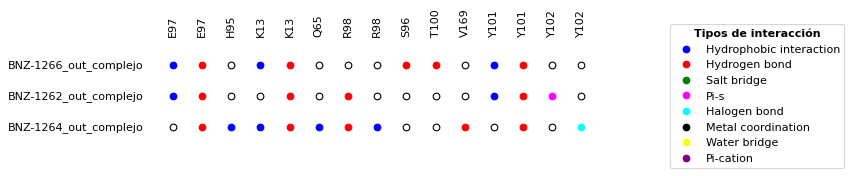

In [16]:
# --------------------------------- CREAR EL GRÁFICO ---------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

# Carga el DataFrame (asegúrate de que df esté ya definido con tus datos)
# df = pd.read_csv("reporte_interacciones.csv")
data = df  # Asume que df ya ha sido cargado previamente

# Obtener nombres de compuestos desde la columna 'ligandos'
compounds = data["ligandos"].values

# Identificar columnas que representan interacciones
interaction_cols = [col for col in data.columns if "_" in col]

# Ordenar columnas por el residuo (segunda parte del nombre, después del guion bajo)
interaction_cols_sorted = sorted(interaction_cols, key=lambda x: x.split("_")[1])

# Dividir tipo de interacción y residuo
interaction_types = [col.split("_")[0] for col in interaction_cols_sorted]

# Colores por tipo de interacción (solo color, no estilos)
interaction_colors = {
    'HI': "blue",     # Hydrophobic interaction
    'HB': "red",      # Hydrogen bond
    'SB': "green",    # Salt bridge
    'π-s': "magenta", # Pi-sulfur
    'HalB': "cyan",   # Halogen bond
    'Met': "black",   # Metal coordination
    'WB': "yellow",   # Water bridge
    'π-c': "purple"   # Pi-cation
}

# Nombres completos para la leyenda
interaction_names = {
    'HI': "Hydrophobic interaction",
    'HB': "Hydrogen bond",
    'SB': "Salt bridge",
    'π-s': "Pi-s",
    'HalB': "Halogen bond",
    'Met': "Metal coordination",
    'WB': "Water bridge",
    'π-c': "Pi-cation"
}

# Preparar mapeo de columnas a posiciones y estilos
interaction_plot = [
    (i, 0, interaction_colors.get(interaction_types[i], "black"))
    for i in range(len(interaction_cols_sorted))
]

# Plot
figure(figsize=(8, 2), dpi=80)
for row_idx, compound in enumerate(compounds):
    plt.text(-1, -row_idx, compound, ha="right", va="center")

    # Acceder a la fila correspondiente por nombre del ligando
    row_values = data.loc[data["ligandos"] == compound, interaction_cols_sorted].values[0]

    for i, present in enumerate(row_values):
        x, y, color = interaction_plot[i]
        y_pos = y - row_idx
        if present > 0:
            plt.plot(x, y_pos, 'o', color=color)
        else:
            plt.plot(x, y_pos, 'o', color="black", mfc="none")

# Etiquetas de residuo en la parte superior
plt.axis([-1, len(interaction_cols_sorted) + 1, -len(compounds), 1])
for i, col in enumerate(interaction_cols_sorted):
    plt.text(i, 1, col.split("_")[1], rotation=90, ha="center")

# Crear leyenda centrada en el lado derecho
handles = []
labels = []
for key, color in interaction_colors.items():
    handles.append(Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=8))
    labels.append(interaction_names.get(key, key))

bold_font = FontProperties(weight='bold')

plt.legend(handles, labels,
           title="Tipos de interacción",
           title_fontproperties=bold_font,
           bbox_to_anchor=(1.05, 0.5),
           loc='center left')

plt.axis('off')
plt.savefig("Interacciones.png", bbox_inches='tight', dpi=300)